In [203]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

import json

import numpy as np
from pywaffle import Waffle

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

import matplotlib.font_manager
matplotlib.rcParams['pdf.fonttype'] = 42

matplotlib.rcParams['font.sans-serif'] = "Open Sans"
matplotlib.rcParams['font.family'] = "sans-serif"

%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns


## Fixing the million columns

In [2]:
dtypes = {
    'eventid': 'int',
    'iyear': 'int',
    'imonth': 'str',
    'iday': 'str',
    'country_txt': 'category',
    'region_txt': 'category',
    'provstate': 'category',
    'city': 'str',
    'latitude': 'float',
    'longitude': 'float',
    'summary': 'str',
    'crit1': 'int',
    'crit2': 'int',
    'crit3': 'int',
    'doubtterr': 'float',
    'success': 'float',
    'suicide': 'float',
    'attacktype1_txt': 'str',
    'attacktype2_txt': 'str',
    'attacktype3_txt': 'str',
    'targtype1_txt': 'str',
    'targsubtype1_txt': 'str',
    'natlty1_txt': 'str',
    'gname': 'category',
    'motive': 'str',
    'nperps': 'float',
    'nperpcap': 'float',
    'claimed': 'float',
    'weaptype1_txt': 'category',
    'weaptype2_txt': 'category',
    'nkill': 'float',
    'nkillter': 'float',
    'nwound': 'float',
    'propextent_txt': 'str',
    'nhostkid': 'float'
}

## Reading in the CSV

In [3]:
df = pd.read_excel('data/globalterrorismdb_0718dist.xlsx', na_values=['nan'], dtype=dtypes, usecols=['eventid', 'iyear', 'imonth', 'iday', 'country','country_txt', 'region_txt','provstate','city','latitude','longitude','summary','crit1','crit2','crit3','doubtterr','success','suicide','attacktype1_txt','attacktype2_txt','attacktype3_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','gname','motive','nperps','nperpcap','claimed','weaptype1_txt','weaptype2_txt','weapdetail','nkill','nkillter','nwound','propextent_txt','nhostkid'])

## Historical df + charts

In [5]:
historical_df = df[(df['country_txt'] == 'United States') & (df.iyear > 1999)]

unknown_counts_df = pd.DataFrame(historical_df[historical_df.gname == "Unknown"].iyear.value_counts().sort_index())

unknown_counts_df.loc[2006] = [0]
unknown_counts_df = unknown_counts_df.sort_index()

all_counts_df = historical_df.iyear.value_counts().sort_index()
all_counts_df = pd.DataFrame(all_counts_df)

per_year_df = unknown_counts_df.merge(all_counts_df, right_index=True, left_index=True)
per_year_df = per_year_df.rename(columns={'iyear_x': 'unknown','iyear_y': 'total'})

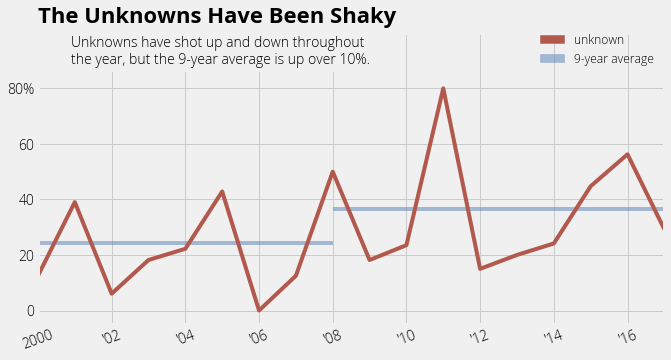

In [352]:
change = per_year_df['unknown']/per_year_df['total']

fig = plt.figure(figsize=(10, 5),dpi=72)
ax = change.plot(kind='line', color="#b2584c")

#  y axis
ax.set_ylim(-.05,1)
ax.set_yticklabels(['','0','20','40','60','80%',''], fontweight='light')

#  x axis
ax.set_xlim(2000,2017)
plt.xticks(rotation=20)
ax.set_xticklabels(["2000","'02","'04","'06","'08","'10","'12","'14","'16"], fontweight='light')

# text
ax.set_title('The Unknowns Have Been Shaky', loc="Left", pad=10, weight='bold',color='black', size=22)
plt.text(2000.9,.89, 'Unknowns have shot up and down throughout\nthe year, but the 9-year average is up over 10%.', size=14, fontweight='light', bbox=dict(facecolor='#F0F0F0', alpha=1))

# legend
average = mpatches.Patch(color='#5580b6', label='9-year average',alpha=.5)
unknown = mpatches.Patch(color='#b2584c', label='unknown')
legend_properties = {'weight':'light', 'size': '12'}
ax.legend(handles=[unknown, average], shadow=True, ncol=1, bbox_to_anchor=(1, 1.035), frameon=False, prop=legend_properties)


early = ((per_year_df['unknown'][:9]).sum())/((per_year_df['total'][:9]).sum()).mean()
ax.hlines(xmin=0, xmax=2008, y=(early), color='#5580b6', alpha=.5)

late = ((per_year_df['unknown'][9:]).sum())/((per_year_df['total'][9:]).sum()).mean()
ax.hlines(xmin=2008, xmax=2017, y=(late), color='#5580b6', alpha=.5)

plt.savefig("images/nine_year_averages.svg", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

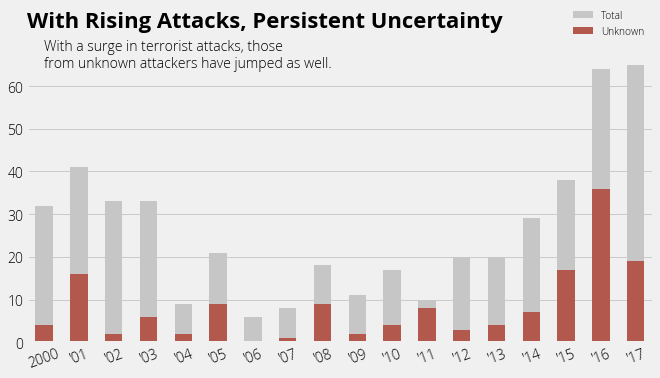

In [357]:
fig = plt.figure()

ax = per_year_df.plot(kind='bar', y='total', color='#C6C6C6', figsize=(10,5))
per_year_df.plot(kind='bar', y='unknown', ax=ax, color='#b2584c')

#  Setting labels up
plt.xticks(rotation=20)
ax.xaxis.grid()
ax.set_xticklabels([2000,"'01","'02","'03","'04","'05","'06","'07","'08","'09","'10","'11","'12","'13","'14","'15","'16","'17"], fontweight='light')
ax.set_yticklabels([0,10,20,30,40,50,60], fontweight='light')

# Legend
legend_properties = {'weight':'light', 'size': '10'}
ax.legend(['Total','Unknown'], shadow=False, ncol=1, bbox_to_anchor=(1, 1.17), frameon=False, prop=legend_properties)

# Text
ax.set_title('With Rising Attacks, Persistent Uncertainty', loc='left', pad=24, weight='bold',color='black', size=22)
plt.text(0, 65,'With a surge in terrorist attacks, those \n from unknown attackers have jumped as well.', wrap=True, ha='left', weight='light', size=14)

plt.savefig("images/amid_rising_attacks.svg", bbox_inches='tight')

## Reading in Census Bureau populations
Using 2018 population estimations

In [353]:
pops = pd.read_csv("data/scprc-est2018-18+pop-res.csv")

In [354]:
pops.head(1)

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
0,10,0,0,0,United States,327167434,253768092,77.6


## Zooming in on events since 2016

In [370]:
df = df[(df['country_txt'] == 'United States') & (df.iyear > 2015)]

In [371]:
df.to_csv('data/terrorism_us_since_2016.csv', index=False)

In [372]:
df = pd.read_csv('data/terrorism_us_since_2016.csv')

In [373]:
df.shape

(129, 37)

In [476]:
pd.DataFrame(df.groupby('gname').iyear.value_counts().sort_values(ascending=False)).index
# df.groupby('gname').iyear.value_counts().sort_values()

MultiIndex(levels=[['Anti-Arab extremists', 'Anti-Government extremists', 'Anti-LGBT extremists', 'Anti-Muslim extremists', 'Anti-Police extremists', 'Anti-Republican extremists', 'Anti-Semitic extremists', 'Anti-Trump extremists', 'Anti-White extremists', 'Black Hebrew Israelites', 'Citizens for Constitutional Freedom', 'Court Reform extremists', 'Environmentalists', 'Jihadi-inspired extremists', 'Ku Klux Klan', 'Muslim extremists', 'Neo-Nazi extremists', 'Pro-LGBT Rights extremists', 'Right-wing extremists', 'Unknown', 'White Rabbit Three Percent Illinois Patriot Freedom Fighters Militia', 'White extremists'], [2016, 2017]],
           codes=[[19, 19, 21, 3, 13, 4, 2, 13, 14, 8, 8, 3, 9, 21, 12, 15, 1, 20, 6, 4, 5, 10, 6, 7, 11, 15, 16, 17, 18, 0], [0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1]],
           names=['gname', 'iyear'])

In [481]:
pd.DataFrame(df.groupby('gname').iyear.value_counts().sort_values(ascending=False))['iyear'].index.get_level_values('iyear')

Int64Index([2016, 2017, 2017, 2017, 2016, 2016, 2017, 2017, 2017, 2016, 2017,
            2016, 2016, 2016, 2017, 2017, 2017, 2017, 2016, 2017, 2017, 2016,
            2017, 2016, 2016, 2016, 2017, 2017, 2017, 2017],
           dtype='int64', name='iyear')

In [493]:
pd.DataFrame(df.groupby('gname').iyear.value_counts().sort_values(ascending=False))['iyear'].index.get_level_values('gname')

Index(['Unknown', 'Unknown', 'White extremists', 'Anti-Muslim extremists',
       'Jihadi-inspired extremists', 'Anti-Police extremists',
       'Anti-LGBT extremists', 'Jihadi-inspired extremists', 'Ku Klux Klan',
       'Anti-White extremists', 'Anti-White extremists',
       'Anti-Muslim extremists', 'Black Hebrew Israelites', 'White extremists',
       'Environmentalists', 'Muslim extremists', 'Anti-Government extremists',
       'White Rabbit Three Percent Illinois Patriot Freedom Fighters Militia',
       'Anti-Semitic extremists', 'Anti-Police extremists',
       'Anti-Republican extremists', 'Citizens for Constitutional Freedom',
       'Anti-Semitic extremists', 'Anti-Trump extremists',
       'Court Reform extremists', 'Muslim extremists', 'Neo-Nazi extremists',
       'Pro-LGBT Rights extremists', 'Right-wing extremists',
       'Anti-Arab extremists'],
      dtype='object', name='gname')

[Text(0, 0, 'Anti-Arab extremists'),
 Text(0, 0, 'Right-wing extremists'),
 Text(0, 0, 'Pro-LGBT Rights extremists'),
 Text(0, 0, 'Neo-Nazi extremists'),
 Text(0, 0, 'Muslim extremists'),
 Text(0, 0, 'Court Reform extremists'),
 Text(0, 0, 'Anti-Trump extremists'),
 Text(0, 0, 'Anti-Semitic extremists'),
 Text(0, 0, 'Citizens for Constitutional Freedom'),
 Text(0, 0, 'Anti-Republican extremists'),
 Text(0, 0, 'Anti-Police extremists'),
 Text(0, 0, 'Anti-Semitic extremists'),
 Text(0, 0, 'White Rabbit Three Percent Illinois Patriot Freedom Fighters Militia'),
 Text(0, 0, 'Anti-Government extremists'),
 Text(0, 0, 'Muslim extremists'),
 Text(0, 0, 'Environmentalists'),
 Text(0, 0, 'White extremists'),
 Text(0, 0, 'Black Hebrew Israelites'),
 Text(0, 0, 'Anti-Muslim extremists'),
 Text(0, 0, 'Anti-White extremists'),
 Text(0, 0, 'Anti-White extremists'),
 Text(0, 0, 'Ku Klux Klan'),
 Text(0, 0, 'Jihadi-inspired extremists'),
 Text(0, 0, 'Anti-LGBT extremists'),
 Text(0, 0, 'Anti-Police ex

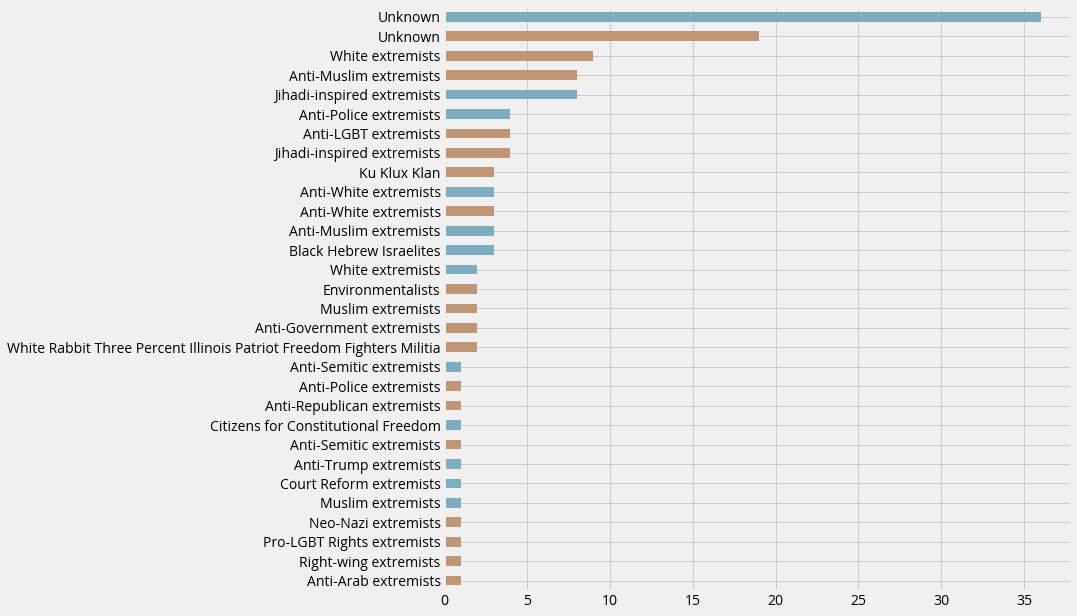

In [496]:
colors= []
for year in pd.DataFrame(df.groupby('gname').iyear.value_counts().sort_values())['iyear'].index.get_level_values('iyear'):
    if year == 2016:
        colors.append('#7EADBF')
    elif year == 2017:
        colors.append('#BF9775')
        
colors

ax = df.groupby('gname').iyear.value_counts().sort_values().plot(kind='barh',color=colors, figsize=(10,10))

# y axis
ax.set_ylabel('')
ax.set_yticklabels(group for group in pd.DataFrame(df.groupby('gname').iyear.value_counts().sort_values())['iyear'].index.get_level_values('gname'))

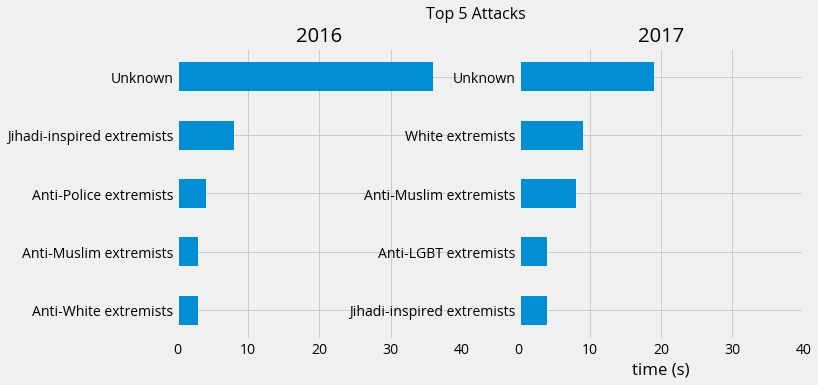

In [513]:
fig = plt.figure(figsize=(10, 5),dpi=72)

plt.subplot(1, 2, 1)
ax = df[df.iyear == 2016].gname.value_counts().head().sort_values().plot(kind='barh')
ax.set_xlim(0,40)
ax.set_title('2016')

# graphic title
ax.text(35, 5, "Top 5 Attacks", size=16)

plt.subplot(1, 2, 2)
ax = df[df.iyear == 2017].gname.value_counts().head().sort_values().plot(kind='barh')
ax.set_xlim(0,40)
ax.set_title('2017')
plt.xlabel('time (s)')

plt.show()

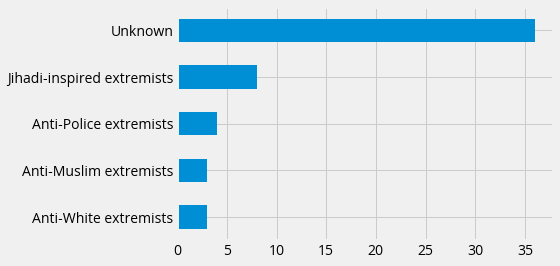

In [399]:
plt.subplot(1, 2, 1)


plt.subplot(1, 2, 2)


df[df.iyear == 2016].gname.value_counts().head().sort_values().plot(kind='barh')

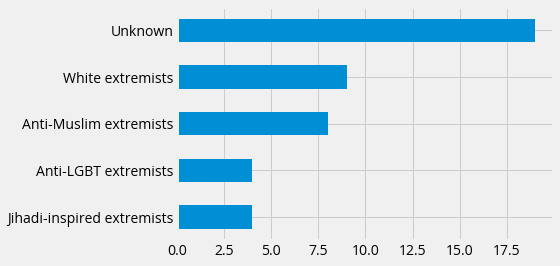

In [400]:
df[df.iyear == 2017].gname.value_counts().head().sort_values().plot(kind='barh')

## Setting up my dataframes

In [374]:
df_else = df[df.gname != 'Unknown']

In [375]:
unknown = df[df.gname == 'Unknown']

## What groups are in here?

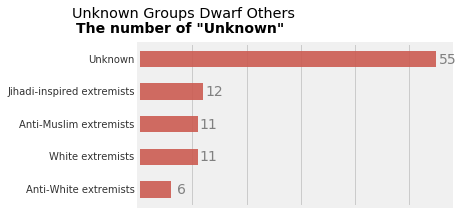

In [16]:
fig = plt.figure()

ax = df.gname.value_counts().sort_values().tail().plot(kind='barh', figsize=(5,3), color='#CC5B51', alpha=.9)

ax.set_title('Unknown Groups Dwarf Others', ha='right', pad=25, weight='normal')
fig.suptitle('The number of "Unknown" ', size=14, fontweight='heavy', ha='right')

ax.set_xticklabels([])
ax.set_yticklabels(labels=df.gname.value_counts().sort_values().tail().index, va='center', color='black', alpha=.8)
ax.yaxis.grid()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width+2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            ha='center', 
            va='center',
            color='gray',
            size=14,
            weight='normal')

plt.style.use('fivethirtyeight')
plt.savefig("images/top_groups.svg", bbox_inches='tight', transparent=True)

## What is in the unknowns?

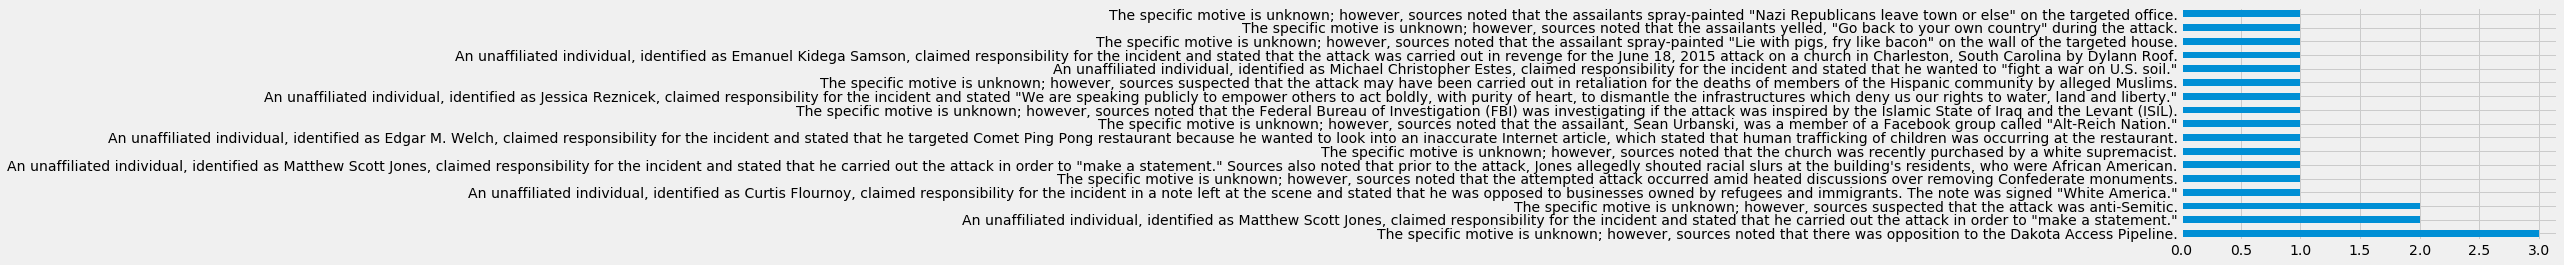

In [17]:
unknown.motive.value_counts().plot(kind='barh')

[Text(0, 0, 'Failed'), Text(0, 0, 'Success')]

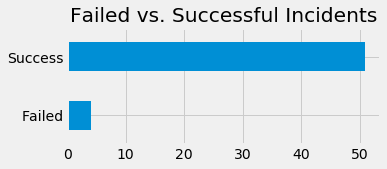

In [18]:
ax = unknown.success.value_counts().sort_values().plot(kind='barh', figsize=(5,2))
ax.set_title('Failed vs. Successful Incidents')
ax.set_yticklabels(['Failed','Success'])

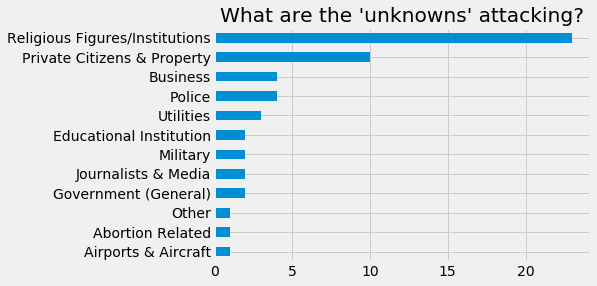

In [19]:
unknown.targtype1_txt.value_counts().sort_values().plot(kind='barh', title="What are the 'unknowns' attacking?")

[Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Police'),
 Text(0, 0, 'Race/Ethnicity'),
 Text(0, 0, 'Place of Worship')]

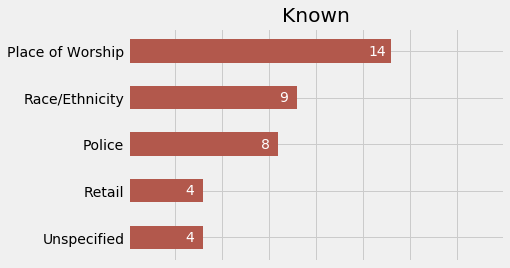

In [20]:
ax = df_else.targsubtype1_txt.value_counts().sort_values().tail().plot(kind='barh', title="Known", color='#B2584C')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width-.7, 
            y+height/2, 
            '{:.0f}'.format(width), 
            ha='center', 
            va='center',
            color='white',
            size=14)
ax.set_xticklabels([])
ax.set_xlim(0,20)
ax.set_yticklabels(['Unspecified','Retail','Police','Race/Ethnicity','Place of Worship'])

[Text(0, 0, 'Journalist'),
 Text(0, 0, 'Residence'),
 Text(0, 0, 'Religious Figure'),
 Text(0, 0, 'Oil'),
 Text(0, 0, 'Place of Worship')]

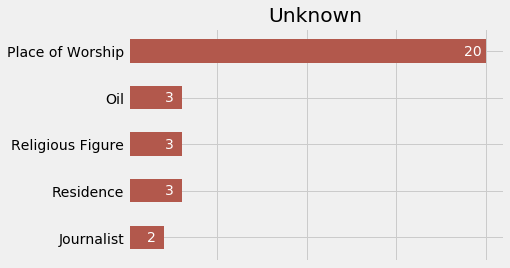

In [21]:
ax = unknown.targsubtype1_txt.value_counts().sort_values().tail().plot(kind='barh', title="Unknown", color='#B2584C')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width-.7, 
            y+height/2, 
            '{:.0f}'.format(width), 
            ha='center', 
            va='center',
            color='white',
            size=14)
ax.set_xticklabels([])
ax.set_yticklabels(['Journalist','Residence','Religious Figure','Oil','Place of Worship'])

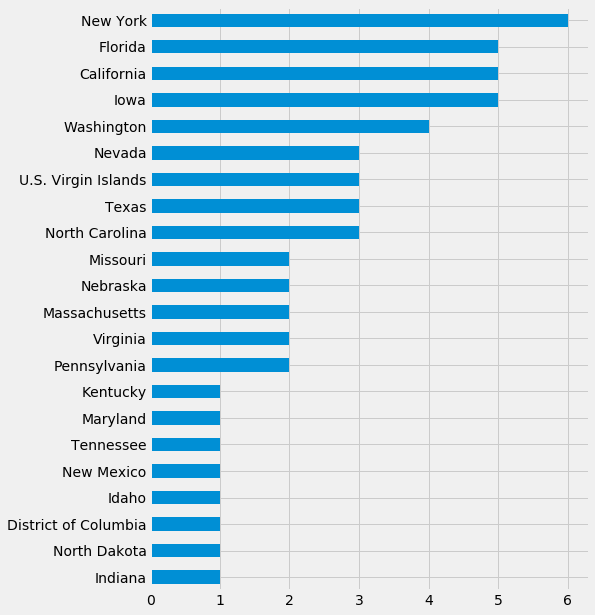

In [22]:
unknown.provstate.value_counts().sort_values().plot(kind='barh', figsize=(7,10))

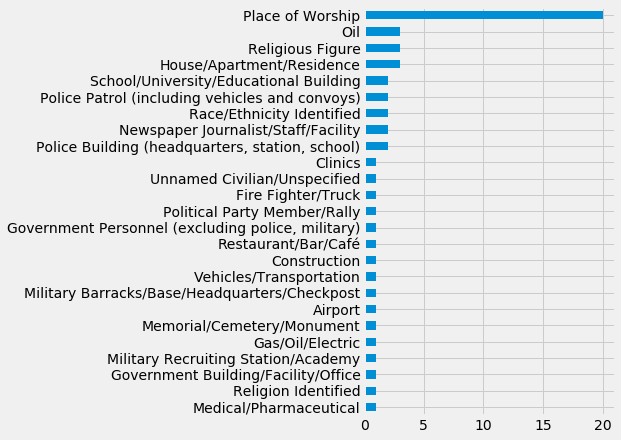

In [23]:
unknown.targsubtype1_txt.value_counts().sort_values().plot(kind='barh', figsize=(4,7))

In [24]:
unknown['iyear'] = unknown['iyear'].astype(str)
unknown['imonth'] = unknown['imonth'].astype(str)
unknown['iday'] = unknown['iday'].astype(str)

def get_date(x):
    return x.iyear + "/" + x.imonth + "/" + x.iday

unknown['date'] = unknown.apply(get_date, axis=1)
unknown['date'] = pd.to_datetime(unknown.date)

C:\Users\sawye\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sawye\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sawye\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [25]:
unknown['targsubtype1_txt'].value_counts()

Place of Worship                                     20
Oil                                                  3 
Religious Figure                                     3 
House/Apartment/Residence                            3 
School/University/Educational Building               2 
Police Patrol (including vehicles and convoys)       2 
Race/Ethnicity Identified                            2 
Newspaper Journalist/Staff/Facility                  2 
Police Building (headquarters, station, school)      2 
Unnamed Civilian/Unspecified                         1 
Fire Fighter/Truck                                   1 
Clinics                                              1 
Medical/Pharmaceutical                               1 
Restaurant/Bar/Café                                  1 
Construction                                         1 
Vehicles/Transportation                              1 
Military Barracks/Base/Headquarters/Checkpost        1 
Airport                                         

C:\Users\sawye\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


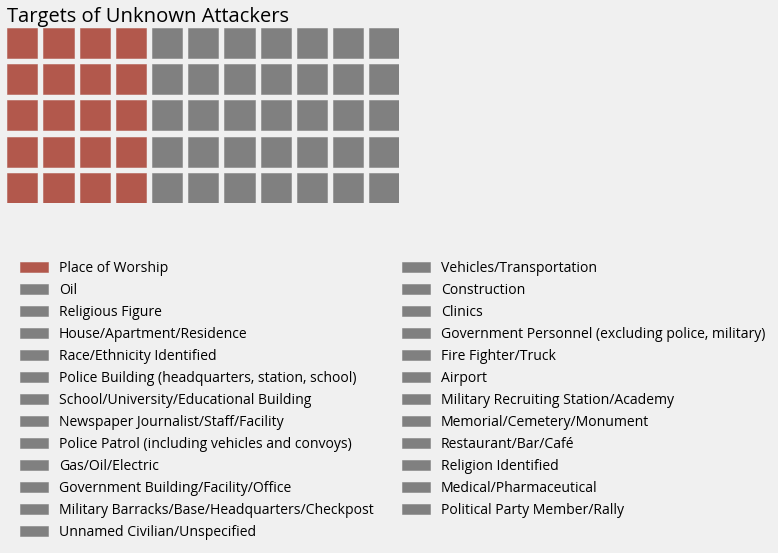

In [517]:
targets_df = unknown['targsubtype1_txt'].value_counts()
targets_df = pd.DataFrame(targets_df)
targets_df = targets_df.reset_index()
targets_df = targets_df.rename(columns={"targsubtype1_txt": "count", "index": "type"})

def get_colors(x):
    if x['type'] == 'Place of Worship':
        return '#B2584C'
#     elif x['type'] == 'Religion Identified':
#         return '#733931'
#     elif x['type'] == 'Religious Figure':
#         return '#994C42'
    else:
        return 'gray'
colors = targets_df.apply(get_colors, axis=1)

cols = []
for item in colors:
    cols.append(item)
    
targets_df = unknown['targsubtype1_txt'].value_counts()
targets_df = pd.DataFrame(targets_df)
targets_df = targets_df.to_dict()

data = targets_df['targsubtype1_txt']
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(10,3),
    rows=5, 
    values=data, 
    colors=cols,
    title={'label': 'Targets of Unknown Attackers', 'loc': 'left'},
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -2), 'ncol': 2, 'framealpha': 0}
)

plt.savefig("images/place_of_worship_waffle_chart.pdf", bbox_inches='tight')

In [27]:
df['gname'].value_counts()

Unknown                                                                 55
Jihadi-inspired extremists                                              12
Anti-Muslim extremists                                                  11
White extremists                                                        11
Anti-White extremists                                                   6 
Anti-Police extremists                                                  5 
Anti-LGBT extremists                                                    4 
Ku Klux Klan                                                            3 
Muslim extremists                                                       3 
Black Hebrew Israelites                                                 3 
Anti-Government extremists                                              2 
Anti-Semitic extremists                                                 2 
White Rabbit Three Percent Illinois Patriot Freedom Fighters Militia    2 
Environmentalists        

In [28]:
targets_df = df['gname'].value_counts()
targets_df = pd.DataFrame(targets_df)
targets_df = targets_df.reset_index()
targets_df = targets_df.rename(columns={"gname": "count", "index": "name"})

def get_colors(x):
    if x['name'] == 'Unknown':
        return '#B2584C'
#     elif x['type'] == 'Religion Identified':
#         return '#733931'
#     elif x['type'] == 'Religious Figure':
#         return '#994C42'
    else:
        return 'gray'
colors = targets_df.apply(get_colors, axis=1)

cols = []
for item in colors:
    cols.append(item)
    
targets_df = unknown['gname'].value_counts()
targets_df = pd.DataFrame(targets_df)
targets_df = targets_df.to_dict()

data = targets_df['gname']
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(10,3),
    rows=5, 
    values=data, 
    colors=cols,
    title={'label': 'Targets of Unknown Attackers', 'loc': 'left'},
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -2), 'ncol': 2, 'framealpha': 0}
)

plt.savefig("images/unknown_waffle_chart.pdf", bbox_inches='tight')

ValueError: Length of colors doesn't match the values.

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

data = targets_df['targsubtype1_txt']
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(10,3),
    rows=5, 
    values=data, 
    colors=cols,
    title={'label': 'Targets of Unknown Attackers', 'loc': 'left'},
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -4), 'ncol': 2, 'framealpha': 0}
)

plt.savefig("images/place_of_worship_waffle_chart.pdf", bbox_inches='tight')

In [ ]:
## Export for qgis
df.to_csv("data/terrorism_us.csv", index=False)

## Mapbox?

In [ ]:
def get_coords(x):
#     geometry = {}
    try:
        try:
            x['place'] = x.city+", "+x.provstate
        except:
            x['place'] = x.city
        x['geometry.type'] = 'Point'
        coords = []
        coords.append(x.longitude)
        coords.append(x.latitude)
        x['geometry.coordinates'] = coords
        return x
    except: 
        return nan

In [ ]:
df = df.apply(get_coords, axis=1)

In [ ]:
def prop_ids(x):
    if x['attacktype1_txt'] == "Facility/Infrastructure Attack":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#20365E"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 1
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Armed Assault":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#E84C3D"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 2
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Bombing/Explosion":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#D25302"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 3
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Unarmed Assault":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#FDDBB0"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 4
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hostage Taking (Barricade Incident)":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#354A5F"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 5
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Assassination":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#9A59B5"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 6
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hostage Taking (Kidnapping)":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#3598DB"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 7
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hijacking":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#1CBB9B"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 8
        x['properties.radius'] = x.nkill
        return x
    else:
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#1CBB9B"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 9
        x['properties.radius'] = x.nkill
        return x

In [ ]:
df = df.apply(prop_ids, axis=1)

In [ ]:
def prop_headline(x):
    return x

In [ ]:
df['properties.headline'] = df.gname.apply(lambda x: prop_headline(x))

In [ ]:
df.shape

In [ ]:
def prop_article(row):
    return f"\
    <div id='article_container'>\
    <h2>{row.gname}</h1>\
    <div id='headline'><h4 style='border-bottom: 3px solid {row.properties_color}'>{row.attacktype1_txt}</h2></div>\
    <p >{row.summary}</p>\
    <p><b>People killed:</b> {row.nkill} people</p>\
    <p><b>People Wounded:</b> {row.nwound}.</p>\
    <p><b>Target:</b> {row.targtype1_txt}\
    </div>" 


In [ ]:
df['properties.article'] = df.apply(prop_article, axis=1)

In [ ]:
df.to_csv("terrorism_us_map.csv", index=False)

In [ ]:
map_df = pd.read_csv("terrorism_us_map.csv", thousands=",", usecols=['geometry.coordinates', 'geometry.type', 'properties.name', 'properties.headline', 'properties.article', 'properties.color', 'properties.group_id', 'properties.group_name', 'properties.radius'])

In [ ]:
map_df['geometry.coordinates'] = map_df['geometry.coordinates'].apply(json.loads)

In [ ]:
ok_json = json.loads(map_df.to_json(orient='records'))

In [ ]:
def process_to_geojson(file):
    geo_data = {"type": "FeatureCollection", "features":[]}
    for row in file:
        this_dict = {"type": "Feature", "properties":{}, "geometry": {}}
        for key, value in row.items():
            key_names = key.split('.')
            if key_names[0] == 'geometry':
                this_dict['geometry'][key_names[1]] = value
            if str(key_names[0]) == 'properties':
                this_dict['properties'][key_names[1]] = value
        geo_data['features'].append(this_dict)
    return geo_data

In [ ]:
geo_format = process_to_geojson(ok_json)

In [ ]:
with open('geo-data.js', 'w') as outfile:
    outfile.write("var infoData = " + json.dumps(geo_format))

## Zooming out to look at each state

In [ ]:
state_counts = pd.DataFrame(df['provstate'].value_counts()).reset_index()

In [ ]:
state_counts.head()

In [ ]:
state_counts = state_counts.merge(pops, left_on='index', right_on='NAME')

In [ ]:
state_counts['per_capita'] = (state_counts['provstate'] / state_counts['POPESTIMATE2018']) * 10000000
state_counts

In [ ]:
state_counts.sort_values(by='per_capita').plot(kind="barh", x='index', y='per_capita', figsize=(7,15), legend=False, width=.5)

In [ ]:
latlong = pd.read_csv('C:/Users/sawye/Documents/Random__data/geographic/states/us-state-capitals.csv')

In [ ]:
state_counts = state_counts.merge(latlong, right_on='state', left_on='index')

In [ ]:
state_counts.head()

In [ ]:
state_counts.to_csv('data/terrorism_by_state_since_2016.csv', index=False)